# Aggregate and merge data with pandas lego dataset

Today we're going to be diving deep into a dataset all about LEGO, which will help us answer a whole bunch of interesting questions about the history of the company, their product offering, and which LEGO set rules them all:

- What is the most enormous LEGO set ever created and how many parts did it have?

- In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

- Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

- When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?

- Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?

<img  src="./assets/bricks.jpg" />

## Import statements

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

Now, let's get warmed up and write some Python code. Let's find out how many different colour LEGO bricks are actually in production!

Read the colors.csv file from the data folder and find the total number of unique colours.

There's a number of different ways you can accomplish this. Maybe try using the .nunique() from Pandas this time.

Also, figure out how many of the LEGO colours are transparent compared to how many colours are opaque.

In [4]:
df_colors = pd.read_csv("./data/colors.csv")

df_colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [5]:
len(pd.unique(df_colors.name))

135

In [6]:
len(pd.unique(df_colors.rgb))

124

In [7]:
df_colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [8]:
df_colors[['is_trans', 'id']].groupby('is_trans').count()

,id
is_trans,
f,107
t,28


In [9]:
df_colors.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

# Understanding LEGO THEMES VS. LEGO Sets

Walk into a LEGO store and you will see their products organized by theme. Their themes include Star Wars, Batman, Harry Poter and many more.

<img src="./assets/lego_themes.png" />

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has have many different sets.

<img src="./assets/lego_sets.png" />

## Exploring the sets.csv

The sets.csv contains a list of LEGO sets. It shows in which year the set was released and the number of parts in the set.

Can you take the first steps in exploring this dataset? Read the .csv and take a look at the columns.

Then try and answer the following questions:

- In which year were the first LEGO sets released and what were these sets called?







In [10]:
df_sets = pd.read_csv("./data/sets.csv")
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [11]:
sorted_sets = df_sets.sort_values(by="year").reset_index(drop=True)
sorted_sets.loc[0]["name"]

'Extra-Large Gift Set (ABB)'

- How many different products did the LEGO company sell in their first year of operation?


In [15]:
sorted_sets.loc[0].year

np.int64(1949)

In [21]:
len(sorted_sets[sorted_sets.year == sorted_sets.loc[0].year])

5

- What are the top 5 LEGO sets with the most number of parts? 

In [25]:
sorted_sets = df_sets.sort_values(by="num_parts", ascending=False)
sorted_sets.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


# Visualize the Number of Sets Published over Time

Now let's take a look at how many sets the LEGO company has published year-on-year. This might tell us something about how LEGO's product offering has changed over time.

Let's create a new Series called sets_by_year which has the years as the index and the number of sets as the value. Use .groupby() and count() to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?



In [40]:
sets_by_year = df_sets.groupby('year')['year'].count()
sets_by_year.head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: year, dtype: int64

In [41]:
sets_by_year.tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: year, dtype: int64

From this, we can see that LEGO published less than 10 different sets per year during its first few years of operation. But by 2019 the company had grown spectacularly, releasing 840 sets in that year alone!

You also notice that there is an entry for 2021. The .csv file is from late 2020, so it appears that it already includes some sets on a forward-looking basis. 

Having summed the number of LEGO sets per year, visualise this data using a line chart with Matplotlib.

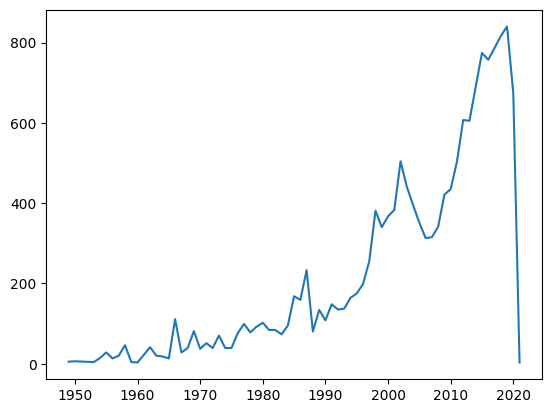

In [34]:
plt.plot(sets_by_year.index, sets_by_year.values)

Because the .csv file is from late 2020, to plot the full calendar years, you will have to exclude some data from your chart. Use the slicing techniques to avoid plotting the last two years?

In [ ]:
sets_by_year = sets_by_year[:-2]

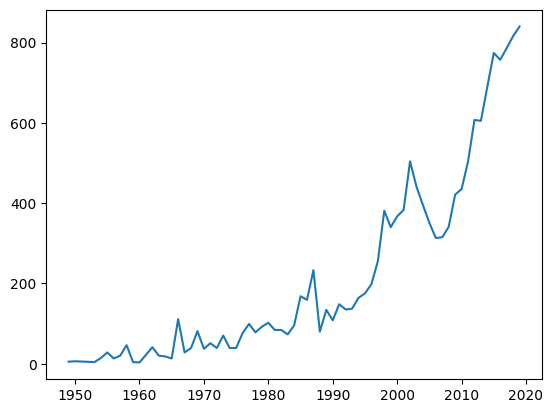

In [39]:
plt.plot(sets_by_year.index, sets_by_year.values)

If we don't exclude the last two years we get a dramatic drop at the end of the chart. This is quite misleading as it suggests LEGO is in big trouble! Given the dataset does not include a full calendar year for 2020, it's best to exclude the last two rows to get a better picture. 

We also see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.

# How to use the Pandas .agg() function

Often you find yourself needing to summarise data. This is where the .groupby() function comes in really handy. However, sometimes you want to run even more operations based on a particular DataFrame column. This is where the [.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) method comes in.

In our case, we want to calculate the number of different themes by calendar year. This means we have to group the data by year and then count the number of unique theme_ids for that year.

## Number of Themes per Calendar Year

We can accomplish this by chaining the `.groupby()` and the `.agg()` functions together:

In [43]:
themes_by_year = df_sets.groupby('year').agg({ 'theme_id': pd.Series.nunique })
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


Note, the `.agg()` method takes a dictionary as an argument. In this dictionary, we specify which operation we'd like to apply to each column. In our case, we just want to calculate the number of unique entries in the theme_id column by using our old friend, the `.nunique()` method.

Let's give our column in `themes_by_year` a more appropriate name and let's take a look at what we've got:

In [44]:
themes_by_year.rename(columns={'theme_id': "nr_themes"}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [45]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


Here we can see that LEGO only had 2 themes during the first few years, but just like the number of sets the number of themes expanded manifold over the years. Let's plot this on a chart again.

Create a line plot of the number of themes released year-on-year. Only include the full calendar years in the dataset (1949 to 2019).

In [46]:
themes_by_year = themes_by_year[:-2]

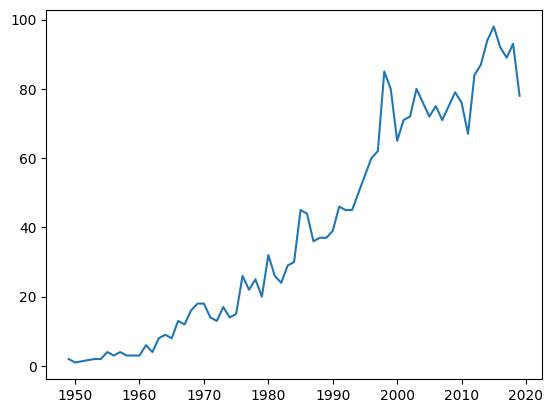

In [49]:
plt.plot(themes_by_year.index, themes_by_year.nr_themes)

Again, we're using the same slicing technique as before. In the chart, we can see that LEGO has pretty consistently added more and more themes until the mid-1990s. From then the number of themes has stagnated for around 10 years or so until the early 2010s.



# Superimposing Line Charts with Separate Axes

Wouldn't it be nice to have the number of themes and the number sets on the same chart? But what do we get if we just plot both of them the way we have before? 

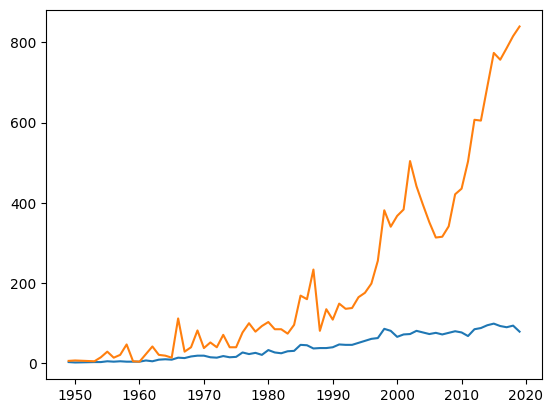

In [55]:
plt.plot(themes_by_year.index, themes_by_year.nr_themes)
plt.plot(sets_by_year[:-2].index, sets_by_year[:-2].values)

Well, that's not very informative! 🤦‍♀️ The problem is that the "number of themes" and the "number of sets" have very different scales. The theme number ranges between 0 and 90, while the number of sets ranges between 0 and 900. So what can we do?

## Two Separate Axes

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

We then create another axis object: `ax2`. The key thing is that by using the `.twinx()` method allows `ax1` and `ax2` to share the same x-axis. When we plot our data on the axes objects we get this:



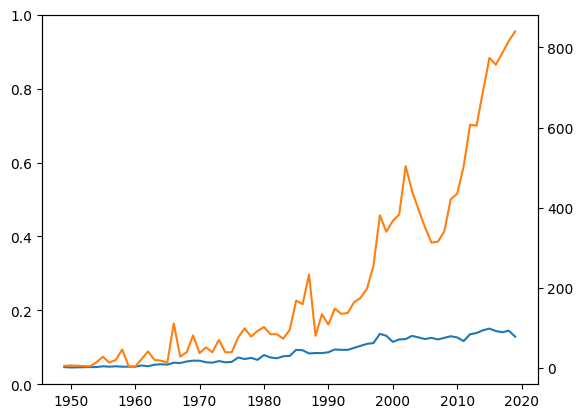

In [ ]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()
plt.plot(themes_by_year.index, themes_by_year.nr_themes)
plt.plot(sets_by_year[:-2].index, sets_by_year[:-2].values)

Lets add some styling:

Text(0, 0.5, 'Number of Sets')

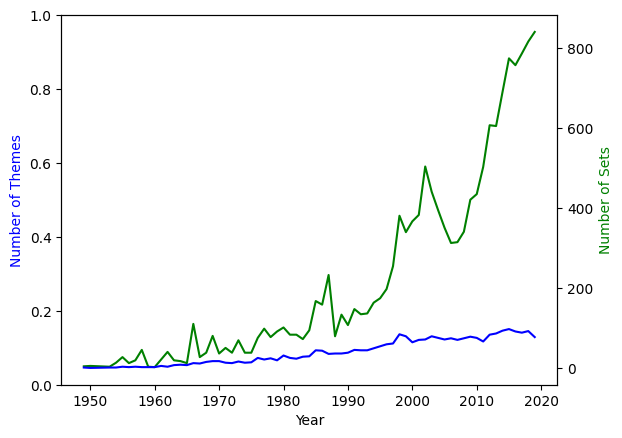

In [61]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

plt.plot(sets_by_year[:-2].index, sets_by_year[:-2].values, color='g')
plt.plot(themes_by_year.index, themes_by_year.nr_themes, 'b')

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Themes", color='blue')
ax2.set_ylabel("Number of Sets", color='green')


# Scatter Plots: Average Number of Parts per LEGO Set

### Complexity Over Typem

Have LEGO sets become larger and more complex over time? Let's work out the average number of parts per LEGO set. This is the perfect time to revise how to use the `.agg()` function.

Create a Pandas Series called `parts_per_set` that has the year as the index and contains the average number of parts per LEGO set in that year. Here's what you're looking to create:

In [66]:
parts_per_set = df_sets.groupby('year').agg({ 'num_parts': pd.Series.mean })
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [67]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


See if you can use [the Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to generate the scatter plot chart. Do you spot a trend in the chart? Again, you'll have to exclude the last two observations.

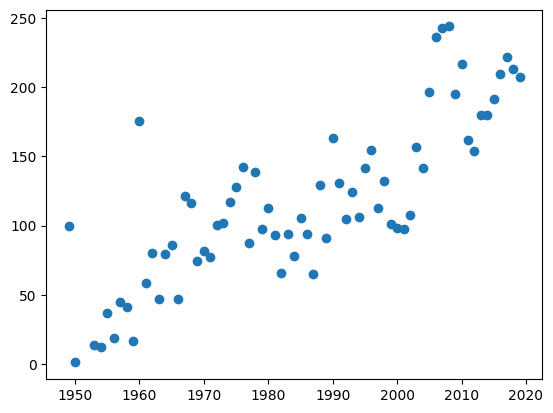

In [70]:
parts_per_set_plot = parts_per_set[:-2]
plt.scatter(parts_per_set_plot.index, parts_per_set_plot.num_parts)

From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

# Relational Database Schemas: Primary and Foreign Keys

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? Is it one of LEGO's own themes like Ninjago or Technic or is it a third party theme? Let's analyse LEGO's product lines in more detail!

### Number of Sets per LEGO Theme

To count the number of sets per Theme we can use the .value_counts() method on our theme_id column. But there's one problem:

In [71]:
set_theme_count = df_sets['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

We have no idea what our themes are actually called! 🤨 Ok, we can see that the theme with id 158 is the largest theme containing 753 individual sets, but what's that theme called? This is not very helpful. We need to find the names of the themes based on the theme_id from the themes.csv file.

<img src="https://i.imgur.com/Sg4lcjx.png"/>

### Working with a Relational Database

What is a database schema? A schema is just how the database is organised. Many relational databases, such as our LEGO data, is split into individual tables. We have separate tables for the colours, the sets and the thems. With a relational database, the tables are linked to each other through their keys.

### Understand the theme.csv file

The themes.csv file has the actual theme names. How is this table linked to the others tables? Well, the sets .csv has theme_ids which match the id column in the themes.csv.

This means that the theme_id is the foreign key inside the sets.csv. Many different sets can be part of the same theme. But inside the themes.csv, each theme_id, which is just called id is unique. This uniqueness makes the id column the primary key inside the themes.csv. To see this in action, explore the themes.csv.

Search for the name 'Star Wars'. How many ids correspond to the 'Star Wars' name in the themes.csv?


In [72]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [81]:
# themes['Star Wars' in themes.name]
star_wars_theme_ids = themes[themes.name.str.lower().str.contains('star wars')]['id']
len(star_wars_theme_ids)


4

In [87]:
star_wars_theme_ids

17      18
150    158
174    209
211    261
Name: id, dtype: int64

Use the ids you just found and look for the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the theme_id column).

In [86]:
df_sets[df_sets.theme_id.isin(star_wars_theme_ids)]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


# How to Merge DataFrames and Create Bar Charts

Wouldn't it be nice if we could combine our data on theme names with the number sets per theme? 

Let's use the [.merge() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge) to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

Currently, our theme_ids and our number of sets per theme live inside a Series called `set_theme_count`.

In [89]:
set_theme_count = df_sets['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

Let's give these guys a name!

To make sure we have a column with the name `id`, I'll convert this Pandas Series into a Pandas DataFrame.

### Merging (i.e. Combining) DataFrames based on a Key

In [90]:
set_theme_count = pd.DataFrame({ 'id': set_theme_count.index, 'set_count': set_theme_count.values })
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


Here I'm providing a dictionary to create the DataFrame. The keys in the dictionary become my column names.

### The Pandas .merge() function

To [.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set `on='id'`. Both our `set_theme_count` and our `themes` DataFrames have a column with this name.

In [91]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


Aha! Star Wars is indeed the theme with the most LEGO sets. Let's plot the top 10 themes on a chart.

### Creating a Bar Chart

Matplotlib can create almost any chart imaginable with very few lines of code. Using [.bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) we can provide our theme names and the number of sets. This is what we get:

<BarContainer object of 10 artists>

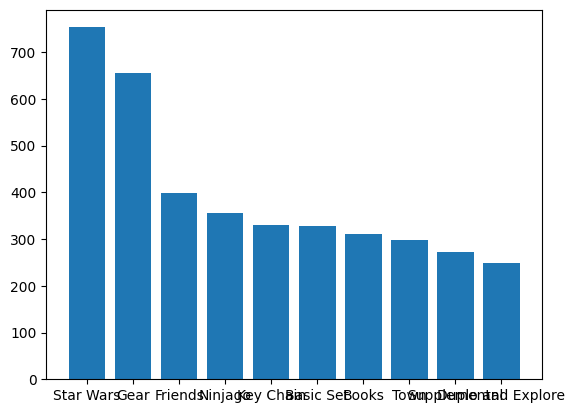

In [92]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

That worked, but it's almost unreadable. 😩 The good thing for us is that we already know how to customize our charts! Here's what we get when we increase the size of our figure, add some labels, and most importantly, rotate the category names on the x-axis so that they don't overlap.

<BarContainer object of 10 artists>

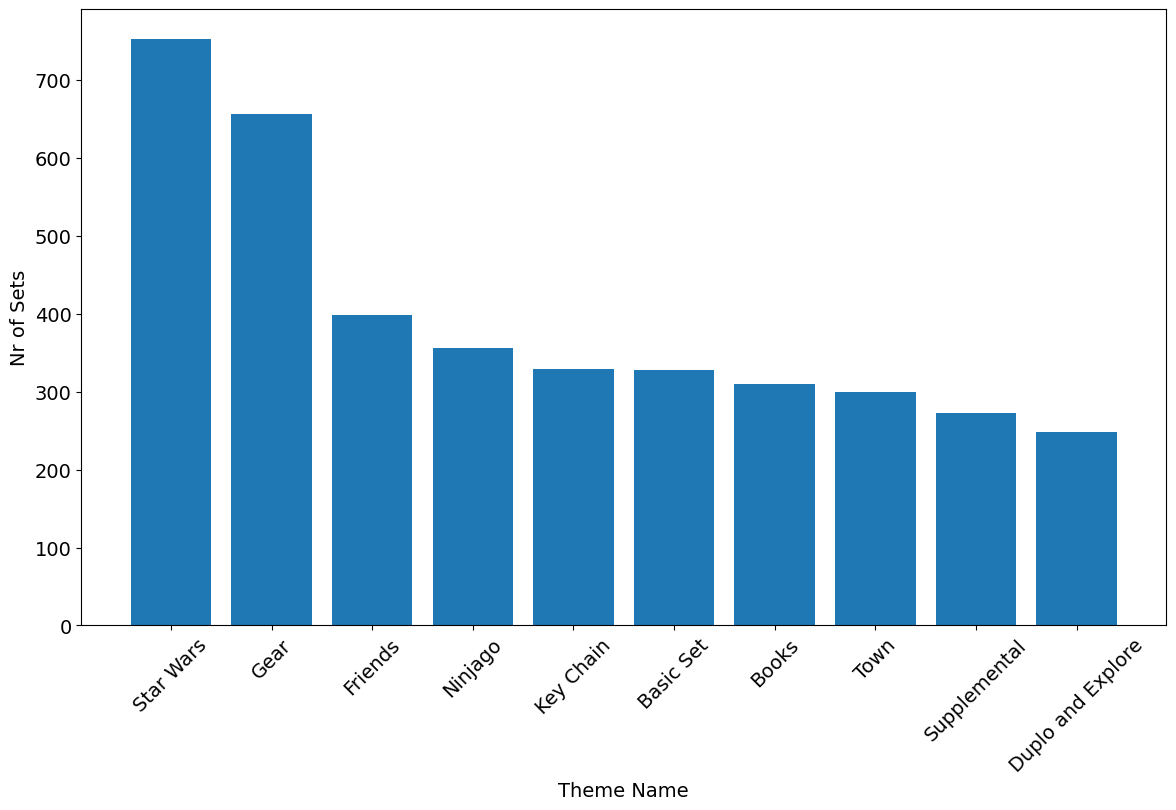

In [93]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel("Nr of Sets", fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

Niiiiice.😌 So what can we see here? Well, a couple of these themes like Star Wars, Town, or Ninjago are what I would think of when I think of LEGO. However, it looks like LEGO also produces a huge number of ... books and key chains?!?! I guess I'm showing my age here, but it's interesting that the LEGO company seems to produce so much more these days than just plastic bricks. The 'Gear' category itself is huge and includes everything from bags to pencil cases apparently. Has LEGO strayed from its core business or is it successfully diversifying? That we can't answer from our dataset. I'll leave that one up to a business school case study to decide. 🤷‍♀️

# Learning Points & Summary

- use HTML Markdown in Notebooks, such as section headings `#` and how to embed images with the <img> tag.

- combine the `groupby()` and `count()` functions to aggregate data

- use the `.value_counts()` function

- slice DataFrames using the square bracket notation e.g., `df[:-2]` or `df[:10]`

- use the `.agg()` function to run an operation on a particular column

- `rename()` columns of DataFrames

- create a line chart with two separate axes to visualise data that have different scales.

- create a scatter plot in Matplotlib

- work with tables in a relational database by using primary and foreign keys

- `.merge()` DataFrames along a particular column

- create a bar chart with Matplotlib